# 6.1 Working with Text Data
---

## Listing 6.1 Word-level one-hot encoding (toy example)
---

In [1]:
import numpy as np
import pandas as pd

%load_ext version_information
%version_information numpy, pandas

Software versions
Python 3.6.6 64bit [MSC v.1900 64 bit (AMD64)]
IPython 7.1.1
OS Windows 10 10.0.17134 SP0
numpy 1.15.2
pandas 0.23.1
Thu Nov 08 21:34:19 2018 ¢¥eCN©öI¡¾©ö C¡ÍA¨ª¨öA

In [2]:
samples = ['The cat sat on the mat.',
           'The dog ate my homework.']

In [3]:
# An index of all tokens in the data
# Keys are unique words and values are unique indices.
token_idx = {}

for sample in samples:
    # Tokenization
    for word in sample.split():
        # Assigns a unique index to each unique word.
        # Note that you don’t attribute index 0 to anything.
        if word not in token_idx:
            token_idx[word] = len(token_idx) + 1

len(token_idx)

10

In [4]:
token_idx

{'The': 1,
 'cat': 2,
 'sat': 3,
 'on': 4,
 'the': 5,
 'mat.': 6,
 'dog': 7,
 'ate': 8,
 'my': 9,
 'homework.': 10}

In [5]:
# You’ll only consider the first max_len words in each sample.
max_len = 10
# Shape: (#Samples, max_len, #Vocabularies + 1)
shape = (len(samples), max_len, len(token_idx) + 1)

res = np.zeros(shape)

res.shape

(2, 10, 11)

In [6]:
for sample_idx, sample in enumerate(samples):
    for word_idx, word in list(enumerate(sample.split()))[:max_len]:
        idx = token_idx[word]
        res[sample_idx, word_idx, idx] = 1

In [7]:
tokens = ['', 'The', 'cat', 'sat', 'on', 'the', 'mat.', 'dog', 'ate', 'my', 'homework.']
df = pd.DataFrame(res[0], columns=tokens)

print(samples[0])
df.style.highlight_max(color='pink', axis=1)

The cat sat on the mat.


,,The,cat,sat,on,the,mat.,dog,ate,my,homework.
0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0


In [8]:
df = pd.DataFrame(res[1], columns=tokens)

print(samples[1])
df.style.highlight_max(color='pink', axis=1)

The dog ate my homework.


,,The,cat,sat,on,the,mat.,dog,ate,my,homework.
0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0


## Listing 6.2 Character-level one-hot encoding (toy example)
---

In [9]:
import string
import pandas as pd

%reload_ext version_information
%version_information pandas

Software versions
Python 3.6.6 64bit [MSC v.1900 64 bit (AMD64)]
IPython 7.1.1
OS Windows 10 10.0.17134 SP0
pandas 0.23.1
Thu Nov 08 21:34:20 2018 ¢¥eCN©öI¡¾©ö C¡ÍA¨ª¨öA

In [10]:
samples = ['The cat sat on the mat.',
           'The dog ate my homework.']

In [11]:
# All printable ASCII characters
characters = string.printable

len(characters)

100

In [12]:
characters

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

In [13]:
token_idx = dict(zip(characters, range(1, len(characters) + 1)))

In [14]:
"""
Return a zip object whose .__next__() method returns a tuple where
the i-th element comes from the i-th iterable argument.  The .__next__()
method continues until the shortest iterable in the argument sequence
is exhausted and then it raises StopIteration.
"""
test = zip((1, 2, 3), ('a', 'b', 'c'))
# test = zip((1, 2, 3), ('a', 'b', 'c', 'd'))

type(test)

zip

In [15]:
for t in test:
    print(t)

(1, 'a')
(2, 'b')
(3, 'c')


In [16]:
for item_idx, item in enumerate(token_idx.items()):
    if item_idx == 20:
        break
    
    print(item)

('0', 1)
('1', 2)
('2', 3)
('3', 4)
('4', 5)
('5', 6)
('6', 7)
('7', 8)
('8', 9)
('9', 10)
('a', 11)
('b', 12)
('c', 13)
('d', 14)
('e', 15)
('f', 16)
('g', 17)
('h', 18)
('i', 19)
('j', 20)


In [17]:
# You’ll only consider the first max_length chracters in each sample.
max_len = 30
# Shape: (#Samples, max_len, #Vocabularies + 1)
shape = (len(samples), max_len, len(token_idx) + 1)

res = np.zeros(shape)

res.shape

(2, 30, 101)

In [18]:
for sample_idx, sample in enumerate(samples):
    for char_idx, char in enumerate(sample):
        idx = token_idx[char]
        res[sample_idx, char_idx, idx] = 1

In [19]:
df = pd.DataFrame(res[0], columns=('',) + tuple(token_idx.keys()))

print(samples[0])
hidden_cols = np.array(tuple(df.columns[:11]) + tuple(df.columns[63:]), dtype='object')
df.style.hide_columns(hidden_cols).highlight_max(color='pink', axis=1)

The cat sat on the mat.


,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
df = pd.DataFrame(res[1], columns=('',) + tuple(token_idx.keys()))

print(samples[1])
df.style.hide_columns(hidden_cols).highlight_max(color='pink', axis=1)

The dog ate my homework.


,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Listing 6.3 Using Keras for word-level one-hot encoding
---

In [21]:
from keras.preprocessing.text import Tokenizer

import pandas as pd

%reload_ext version_information
%version_information keras, pandas

Using TensorFlow backend.


Software versions
Python 3.6.6 64bit [MSC v.1900 64 bit (AMD64)]
IPython 7.1.1
OS Windows 10 10.0.17134 SP0
keras 2.2.4
pandas 0.23.1
Thu Nov 08 21:34:24 2018 ¢¥eCN©öI¡¾©ö C¡ÍA¨ª¨öA

In [22]:
samples = ['The cat sat on the mat.',
           'The dog ate my homework.']

In [23]:
# Creates a tokenizer, configured to only take into account the 1,000 most common words
"""
Text tokenization utility class.

This class allows to vectorize a text corpus, by turning each
text into either a sequence of integers (each integer being the index
of a token in a dictionary) or into a vector where the coefficient
for each token could be binary, based on word count, based on tf-idf...
"""
tokenizer = Tokenizer(num_words=1000)

In [24]:
dir(tokenizer)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'char_level',
 'document_count',
 'filters',
 'fit_on_sequences',
 'fit_on_texts',
 'get_config',
 'index_docs',
 'index_word',
 'lower',
 'num_words',
 'oov_token',
 'sequences_to_matrix',
 'sequences_to_texts',
 'sequences_to_texts_generator',
 'split',
 'texts_to_matrix',
 'texts_to_sequences',
 'texts_to_sequences_generator',
 'to_json',
 'word_counts',
 'word_docs',
 'word_index']

`fit_on_texts` vs. `fit_on_sequences`

In [25]:
# Builds the word index
"""
Updates internal vocabulary based on a list of texts.

In the case where texts contains lists,
we assume each entry of the lists to be a token.

Required before using `texts_to_sequences` or `texts_to_matrix`.
"""
tokenizer.fit_on_texts(samples)

In [26]:
# Turns strings into lists of integer indices
"""
Transforms each text in texts to a sequence of integers.

Only top "num_words" most frequent words will be taken into account.
Only words known by the tokenizer will be taken into account.
"""
seq = tokenizer.texts_to_sequences(samples)

In [27]:
seq

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

In [28]:
tokenizer.index_word

{1: 'the',
 2: 'cat',
 3: 'sat',
 4: 'on',
 5: 'mat',
 6: 'dog',
 7: 'ate',
 8: 'my',
 9: 'homework'}

순서대로 나열된 단어의 인덱스를 통해 다시 단어를 이어붙여서 본래 문장으로 되돌릴 수 있다.

In [29]:
for sample_idxs in seq:
    words = []
    
    for sample_idx in sample_idxs:
        words.append(tokenizer.index_word[sample_idx])
        
    print(' '.join(words))

the cat sat on the mat
the dog ate my homework


One-hot binary representations도 간단하게 획득 가능!

In [30]:
# You could also directly get the one-hot binary representations.
# Vectorization modes other than one-hot encoding are supported by this tokenizer.
"""
Convert a list of texts to a Numpy matrix.
"""
res = tokenizer.texts_to_matrix(samples, mode='binary')
# res = tokenizer.texts_to_matrix(sample, mode='tfidf')

In [31]:
res.shape

(2, 1000)

In [32]:
df = pd.DataFrame(res[:, :10], columns=('',) + tuple(tokenizer.word_index.keys()))

for sample in samples:
    print(sample)
df.style.highlight_max(color='pink', axis=1)

The cat sat on the mat.
The dog ate my homework.


,,the,cat,sat,on,mat,dog,ate,my,homework
0,0,1,1,1,1,1,0,0,0,0
1,0,1,0,0,0,0,1,1,1,1


단순히 사용법이 간단한 것뿐만 아니라, lowercase로 변환, punctuation 제거 등의 추가기능이 적용되었다.

In [33]:
word_idx = tokenizer.word_index

print('Found %s unique tokens.' % len(word_idx))
word_idx

Found 9 unique tokens.


{'the': 1,
 'cat': 2,
 'sat': 3,
 'on': 4,
 'mat': 5,
 'dog': 6,
 'ate': 7,
 'my': 8,
 'homework': 9}

In [34]:
tokenizer.word_counts

OrderedDict([('the', 3),
             ('cat', 1),
             ('sat', 1),
             ('on', 1),
             ('mat', 1),
             ('dog', 1),
             ('ate', 1),
             ('my', 1),
             ('homework', 1)])

## Listing 6.4 Word-level one-hot encoding with hashing trick (toy example)
---

* A **[hash function](https://en.wikipedia.org/wiki/Hash_function)** is any function that can be used to **map data of arbitrary size to data of a fixed size**. The values returned by a hash function are called **hash values**, **hash codes**, **digests**, or simply **hashes**. Hash functions are often used in combination with **a hash table**, a common data structure used in computer software for **rapid data lookup**. Hash functions accelerate table or database lookup **by detecting duplicated records** in a large file.

In [35]:
samples = ['The cat sat on the mat.',
           'The dog ate my homework.']

In [36]:
"""
Stores the words as vectors of size 1,000. If you have close
to 1,000 words (or more), you’ll see many hash collisions,
which will decrease the accuracy of this encoding method.
"""
dim = 1000
max_len = 10
shape = (len(samples), max_len, dim)

res = np.zeros(shape)

res.shape

(2, 10, 1000)

In [37]:
for sample_idx, sample in enumerate(samples):
    for word_idx, word in list(enumerate(sample.split()))[:max_len]:
        # Hashes the word into a random integer index between 0 and 1,000
        idx = abs(hash(word)) % dim
        res[sample_idx, word_idx, idx] = 1

In [38]:
"""
Return the hash value for the given object.

Two objects that compare equal must also have the same hash value, but the
reverse is not necessarily true.
"""
hash('The') % dim

595

In [39]:
hash('cat') % dim

185

In [40]:
idx_cat = hash('cat') % dim

In [41]:
res[:, :, idx_cat]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

## Listing 6.5 Instantiating an Embedding layer
---

In [42]:
from keras.layers import Embedding

%reload_ext version_information
%version_information keras

Software versions
Python 3.6.6 64bit [MSC v.1900 64 bit (AMD64)]
IPython 7.1.1
OS Windows 10 10.0.17134 SP0
keras 2.2.4
Thu Nov 08 21:34:24 2018 ¢¥eCN©öI¡¾©ö C¡ÍA¨ª¨öA

The embedding layer is best understood as a dictionary that maps integer indices (which stand for specific words) to dense vectors.


* Word index → Embedding layer → Corresponding word vector

In [43]:
"""
Turns positive integers (indexes) into dense vectors of fixed size.
eg. [[4], [20]] -> [[0.25, 0.1], [0.6, -0.2]]

This layer can only be used as the first layer in a model.
"""
embedding_lyaer = Embedding(1000,    # input_dim: the number of possible tokens (here, 1,000: 1 + maximum word index)
                            64)    # output_dim: the dimensionality of the embeddings (here, 64)

## Listing 6.6 Loading the IMDB data for use with an Embedding layer
---

In [44]:
from keras.datasets import imdb
from keras import preprocessing

import numpy as np

%reload_ext version_information
%version_information keras, numpy

Software versions
Python 3.6.6 64bit [MSC v.1900 64 bit (AMD64)]
IPython 7.1.1
OS Windows 10 10.0.17134 SP0
keras 2.2.4
numpy 1.15.2
Thu Nov 08 21:34:24 2018 ¢¥eCN©öI¡¾©ö C¡ÍA¨ª¨öA

In [45]:
# Number of words to consider as features
max_features = 10000
# Cuts off the text after this number of words (among the max_features most common words)
max_len = 20

# Loads the data as lists of integers
# num_words: max number of words to include. Words are ranked by how often they occur (in the training set)
#            and only the most frequent words are kept
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [46]:
type(x_train)

numpy.ndarray

`max_features`를 10,000으로 설정했기 때문에 빈도가 높은 순으로 사용할 unique words를 제한한다.

In [47]:
np.unique(x_train)

array([list([1, 2, 2, 2, 2, 9, 4, 86, 6594, 20, 7, 1300, 2, 6457, 5, 1238, 9, 24, 44, 2, 2, 2, 42, 2, 12, 9, 1004, 6, 55, 338, 1830, 11, 6, 2, 11, 6327, 121, 4, 2, 26, 3276, 2, 2, 2, 5233, 372, 4780, 13, 81, 24, 124, 4, 282, 138, 6457, 6546, 14, 1579, 756, 5, 2776, 8, 276, 2511, 21, 849, 36, 26, 55, 619, 537, 49, 7, 98, 483, 2244, 13, 1276, 40, 4, 1301, 65, 7, 4, 430, 5, 27, 336, 15, 925, 19, 6, 313, 7, 68, 205, 5, 2171, 34, 98, 4, 65, 7, 4, 3000, 430, 15, 2251, 29, 7446, 6, 1374, 4, 65, 7, 4, 132, 15, 5245, 677, 476, 17, 48, 36, 71, 68, 205, 3197, 5, 2847, 5, 4, 65, 7, 4, 185, 255, 5233, 34, 41, 2, 61, 2302, 9, 3020, 10, 10, 425, 3829, 2, 475, 1604, 2, 5438, 2, 2, 475, 4, 96, 7, 4, 113]),
       list([1, 2, 2, 2, 2, 9, 6, 87, 20, 24, 64, 11, 4, 291, 12, 16, 324, 21, 82, 150, 45, 35, 498, 20, 63, 9, 24, 5903, 60, 11, 6161, 1117, 4, 167, 2, 6, 52, 1321, 2703, 5, 1346, 93, 4, 65, 38, 3557, 10, 10, 4, 20, 1791, 72, 7, 4, 303, 785, 162, 2869, 20, 2, 2, 5203, 2, 2, 63, 9, 7, 4, 729, 2989]),

In [48]:
print(x_train.dtype, x_train.shape)
print(x_train[0])

object (25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [49]:
np.unique(x_train[0])

array([   1,    2,    4,    5,    6,    7,    8,    9,   12,   13,   14,
         15,   16,   17,   18,   19,   21,   22,   25,   26,   28,   30,
         32,   33,   35,   36,   38,   39,   43,   46,   48,   50,   51,
         52,   56,   62,   65,   66,   71,   76,   77,   82,   87,   88,
         92,   98,  100,  103,  104,  106,  107,  112,  113,  117,  124,
        130,  134,  135,  141,  144,  147,  150,  167,  172,  173,  178,
        192,  194,  215,  224,  226,  256,  283,  284,  297,  316,  317,
        336,  381,  385,  386,  400,  407,  447,  458,  469,  476,  480,
        515,  530,  546,  619,  626,  670,  723,  838,  973, 1029, 1111,
       1247, 1334, 1385, 1415, 1622, 1920, 2025, 2071, 2223, 3766, 3785,
       3941, 4468, 4472, 4536, 4613, 5244, 5345, 5535, 5952, 7486])

In [50]:
print(type(x_train[0]), len(x_train[0]))
print(type(x_train[1]), len(x_train[1]))
print(type(x_train[2]), len(x_train[2]))

<class 'list'> 218
<class 'list'> 189
<class 'list'> 141


In [51]:
print(y_train.dtype, y_train.shape)
for y in y_train[:10]:
    print(y)

int64 (25000,)
1
0
0
1
0
0
1
0
1
0


In [52]:
# Turns the lists of intergers into a 2D integer tensor of shape (samples, max_len)
"""
Pads sequences to the same length.

This function transforms a list of
`num_samples` sequences (lists of integers)
into a 2D Numpy array of shape `(num_samples, num_timesteps)`.
`num_timesteps` is either the `maxlen` argument if provided,
or the length of the longest sequence otherwise.

Sequences that are shorter than `num_timesteps`
are padded with `value` at the end.

Sequences longer than `num_timesteps` are truncated
so that they fit the desired length.
The position where padding or truncation happens is determined by
the arguments `padding` and `truncating`, respectively.

Pre-padding is the default.
"""
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

전처리 하기 전과 비교해보자.


* x_train[0]
   * Length: 218

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]

In [53]:
print(x_train.dtype, x_train.shape)
x_train[0]

int32 (25000, 20)


array([  65,   16,   38, 1334,   88,   12,   16,  283,    5,   16, 4472,
        113,  103,   32,   15,   16, 5345,   19,  178,   32])

* np.unique(x_train[0])


[   1,    2,    4,    5,    6,    7,    8,    9,   12,   13,   14,
15,   16,   17,   18,   19,   21,   22,   25,   26,   28,   30,
32,   33,   35,   36,   38,   39,   43,   46,   48,   50,   51,
52,   56,   62,   65,   66,   71,   76,   77,   82,   87,   88,
92,   98,  100,  103,  104,  106,  107,  112,  113,  117,  124,
130,  134,  135,  141,  144,  147,  150,  167,  172,  173,  178,
192,  194,  215,  224,  226,  256,  283,  284,  297,  316,  317,
336,  381,  385,  386,  400,  407,  447,  458,  469,  476,  480,
515,  530,  546,  619,  626,  670,  723,  838,  973, 1029, 1111,
1247, 1334, 1385, 1415, 1622, 1920, 2025, 2071, 2223, 3766, 3785,
3941, 4468, 4472, 4536, 4613, 5244, 5345, 5535, 5952, 7486])

In [54]:
np.unique(x_train[0])

array([   5,   12,   15,   16,   19,   32,   38,   65,   88,  103,  113,
        178,  283, 1334, 4472, 5345])

## Listing 6.7 Using an Embedding layer and classifier on the IMDB data
---

In [55]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

%reload_ext version_information
%version_information keras

Software versions
Python 3.6.6 64bit [MSC v.1900 64 bit (AMD64)]
IPython 7.1.1
OS Windows 10 10.0.17134 SP0
keras 2.2.4
Thu Nov 08 21:34:27 2018 ¢¥eCN©öI¡¾©ö C¡ÍA¨ª¨öA

In [56]:
model = Sequential()
# Specifies the maximum input length to the Embedding layer so you can later flatten the embedded inputs.
# After the Embedding layer, the activations have shape (samples, maxlen, 8).
model.add(Embedding(10000, 8, input_length=max_len))
# Flattens the 3D tensor of embeddings into a 2D tensor of shape (samples, maxlen * 8)
model.add(Flatten())
# Adds the classifier on top
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [57]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 1s 34us/step - loss: 0.6759 - acc: 0.6051 - val_loss: 0.6398 - val_acc: 0.6814
Epoch 2/10
20000/20000 [==============================] - 1s 28us/step - loss: 0.5657 - acc: 0.7427 - val_loss: 0.5467 - val_acc: 0.7206
Epoch 3/10
20000/20000 [==============================] - 1s 28us/step - loss: 0.4752 - acc: 0.7808 - val_loss: 0.5113 - val_acc: 0.7384
Epoch 4/10
20000/20000 [==============================] - 1s 27us/step - loss: 0.4263 - acc: 0.8077 - val_loss: 0.5008 - val_acc: 0.7452
Epoch 5/10
20000/20000 [==============================] - 1s 27us/step - loss: 0.3930 - acc: 0.8257 - val_loss: 0.4981 - val_acc: 0.7536
Epoch 6/10
20000/20000 [==============================] - 1s 28us/step - loss: 0.3668 - acc: 0.8395 - val_loss: 0.5014 - val_acc: 0.7530
Epoch 7/10
20000/20000 [==============================] - 1s 28us/step - loss: 0.3435 - acc: 0.8533 - val_loss: 0.5052 - val_acc:

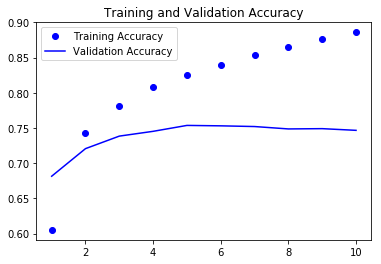

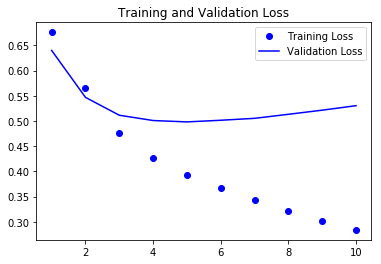

In [58]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Accuracy curves
plt.figure()
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss curves
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

## Listing 6.8 Processing the labels of the raw IMDB data
---

From **raw text** (the original IMDB text data instead of the pretokenized data) to word embeddings


Collect the individual training reviews into a list of strings, one string per review, with labels (positive/negative).

In [59]:
import glob
import os

%reload_ext version_information
%version_information keras

Software versions
Python 3.6.6 64bit [MSC v.1900 64 bit (AMD64)]
IPython 7.1.1
OS Windows 10 10.0.17134 SP0
keras 2.2.4
Thu Nov 08 21:34:33 2018 ¢¥eCN©öI¡¾©ö C¡ÍA¨ª¨öA

`os.listdir`을 사용한 경우

In [60]:
imdb_dir = 'D:/utils/jin_utils/data/dataset/aclImdb/'
train_dir = os.path.join(imdb_dir, 'train')

In [61]:
labels = []
texts = []

for label_type in ['neg', 'pos']:
    file_path = os.path.join(train_dir, label_type)
    
    for filename in sorted(os.listdir(file_path)):
        if filename[-4:] == '.txt':
            with open(os.path.join(file_path, filename), encoding='utf8') as f:
                texts.append(f.read())
            
            # Negative label: 0 
            if label_type == 'neg':
                labels.append(0)
            # Positive label: 1
            else:
                labels.append(1)

`glob.glob`을 사용한 경우

In [62]:
imdb_dir = 'D:/utils/jin_utils/data/dataset/aclImdb/'
train_dir = os.path.join(imdb_dir, 'train')

In [63]:
labels = []
texts = []

for label_type in ['neg', 'pos']:
    file_path = os.path.join(train_dir, label_type)
    
    for filename in sorted(glob.glob(os.path.join(file_path, '*.txt'))):
        with open(filename, encoding='utf8') as f:
            texts.append(f.read())

        # Negative label: 0 
        if label_type == 'neg':
            labels.append(0)
        # Positive label: 1
        else:
            labels.append(1)

결과는 동일하지만, 전자는 파일명만 들고 있어서 파일을 열 때 그 앞의 path를 연결해줘야 하고, 후자는 전체 path를 통째로 들고 있어서 그대로 사용할 수 있는 대신 메모리를 더 소모한다.

In [64]:
len(os.listdir(file_path))

12500

In [65]:
sorted(os.listdir(file_path))[:10]

['0_9.txt',
 '10000_8.txt',
 '10001_10.txt',
 '10002_7.txt',
 '10003_8.txt',
 '10004_8.txt',
 '10005_7.txt',
 '10006_7.txt',
 '10007_7.txt',
 '10008_7.txt']

In [66]:
len(glob.glob(os.path.join(file_path, '*.txt')))

12500

In [67]:
sorted(glob.glob(os.path.join(file_path, '*.txt')))[:10]

['D:/utils/jin_utils/data/dataset/aclImdb/train\\pos\\0_9.txt',
 'D:/utils/jin_utils/data/dataset/aclImdb/train\\pos\\10000_8.txt',
 'D:/utils/jin_utils/data/dataset/aclImdb/train\\pos\\10001_10.txt',
 'D:/utils/jin_utils/data/dataset/aclImdb/train\\pos\\10002_7.txt',
 'D:/utils/jin_utils/data/dataset/aclImdb/train\\pos\\10003_8.txt',
 'D:/utils/jin_utils/data/dataset/aclImdb/train\\pos\\10004_8.txt',
 'D:/utils/jin_utils/data/dataset/aclImdb/train\\pos\\10005_7.txt',
 'D:/utils/jin_utils/data/dataset/aclImdb/train\\pos\\10006_7.txt',
 'D:/utils/jin_utils/data/dataset/aclImdb/train\\pos\\10007_7.txt',
 'D:/utils/jin_utils/data/dataset/aclImdb/train\\pos\\10008_7.txt']

In [68]:
print(type(texts), len(texts))
texts[0]

<class 'list'> 25000


"Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly."

In [69]:
print(type(labels), len(labels))
for label in labels[:10]:
    print(label)

<class 'list'> 25000
0
0
0
0
0
0
0
0
0
0


## Listing 6.9 Tokenizing the text of the raw IMDB data
---

Vectorize the text and prepare a training and validation split.


Twist to test pretrained word embeddings: restrict the training data to the first 200 samples.

In [70]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import numpy as np

%reload_ext version_information
%version_information keras, numpy

Software versions
Python 3.6.6 64bit [MSC v.1900 64 bit (AMD64)]
IPython 7.1.1
OS Windows 10 10.0.17134 SP0
keras 2.2.4
numpy 1.15.2
Thu Nov 08 21:35:49 2018 ¢¥eCN©öI¡¾©ö C¡ÍA¨ª¨öA

In [71]:
# Cuts off reviews after 100 words
max_len = 100
# Number of words to consider as features based on word frequency
max_words = 10000

train_samples = 200
val_samples = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_idx = tokenizer.word_index

print('Found %s unique tokens.' % len(word_idx))

data = pad_sequences(sequences, maxlen=max_len)
labels = np.asarray(labels)

Found 88582 unique tokens.


In [72]:
word_idx_tuple = tuple(word_idx.items())

print(type(word_idx), len(word_idx))
word_idx_tuple[:10]

<class 'dict'> 88582


(('the', 1),
 ('and', 2),
 ('a', 3),
 ('of', 4),
 ('to', 5),
 ('is', 6),
 ('br', 7),
 ('in', 8),
 ('it', 9),
 ('i', 10))

In [73]:
word_idx_tuple[100:110]

(('think', 101),
 ('characters', 102),
 ('watch', 103),
 ('two', 104),
 ('films', 105),
 ('character', 106),
 ('seen', 107),
 ('many', 108),
 ('being', 109),
 ('life', 110))

In [74]:
print(data.dtype, data.shape)
data[0]

int32 (25000, 100)


array([  34,   44, 7576, 1414,   15,    3, 4252,  514,   43,   16,    3,
        633,  133,   12,    6,    3, 1301,  459,    4, 1751,  209,    3,
       7693,  308,    6,  676,   80,   32, 2137, 1110, 3008,   31,    1,
        929,    4,   42, 5120,  469,    9, 2665, 1751,    1,  223,   55,
         16,   54,  828, 1318,  847,  228,    9,   40,   96,  122, 1484,
         57,  145,   36,    1,  996,  141,   27,  676,  122,    1,  411,
         59,   94, 2278,  303,  772,    5,    3,  837,   20,    3, 1755,
        646,   42,  125,   71,   22,  235,  101,   16,   46,   49,  624,
         31,  702,   84,  702,  378, 3493,    2, 8422,   67,   27,  107,
       3348])

In [75]:
print(labels.dtype, labels.shape)
for label in labels[:10]:
    print(label)

int32 (25000,)
0
0
0
0
0
0
0
0
0
0


In [76]:
# Splits the data into a training set and a validation set, but first shuffles the data,
# because you’re starting with data in which samples are ordered (all negative first, then all positive)
idxs = np.arange(data.shape[0])
np.random.shuffle(idxs)
data = data[idxs]
labels = labels[idxs]

x_train = data[:train_samples]
y_train = labels[:train_samples]
x_val = data[train_samples:train_samples + val_samples]
y_val = labels[train_samples:train_samples + val_samples]

In [77]:
print(x_train.dtype, x_train.shape)
x_train[0]

int32 (200, 100)


array([  11,  387,   40,    5,   64,  326,   71, 2087,  451,   32,  218,
        152,   41,    1,  668,    4, 9430,   51, 4937,  124,    9,    5,
         24, 1483,   33,  410,  676, 1643,   87,   38,  187,   51, 3277,
         56,   61,   85,    2,    2,  124,   21,  410, 3616,    5, 3277,
        276,   42,   85, 4937,   44,   50,  581,   30,    9,   71, 3277,
         11,  387, 1785,   69,    4,  135,    9,   59,  515,   27, 4290,
          5,   19,   53,    8,  698, 7133,  466,    1,  387,    9,    6,
         35, 4418,    2,    9,   97,   21,   25,   74,   12,   73,  250,
        464,    1, 1330,  274, 4635,    6,  128,    3,  539,  387,    5,
        647])

In [78]:
print(y_train.dtype, y_train.shape)
for y in y_train[:10]:
    print(y)

int32 (200,)
1
1
1
1
0
0
1
0
1
1


In [79]:
print(x_val.dtype, x_val.shape)
x_val[0]

int32 (10000, 100)


array([   1,   19,    9,    6,   70,  915,    1,  351,    4, 8386,   23,
         52,  734,   33,   25,    3,   49, 1171,  292,  163,    3, 4999,
       8496,  165, 2867,    3,   17,   37,   11,  239,  584,   27,   90,
          8,  131, 4091, 2294,  208,   30,  219,   21,    8,    1,  175,
        234,    9,  183,    5,  180,   37,  564, 4570, 5688,  381,   11,
         17, 1526,   12,   16,    3, 1016,  174,   79, 1016,  937,    3,
         49,   17,    6,    3,   49,   17,   54,  548,    1,  872,    9,
         69,    5,  166,   43, 2330, 2535, 1715,    8,    1,  747,  702,
         10, 8604,   77,  806,   87,   43,   16, 8386,    8,   76,   43,
        126])

In [80]:
print(y_val.dtype, y_val.shape)
for y in y_val[:10]:
    print(y)

int32 (10000,)
1
1
1
0
0
0
1
1
1
0


## Listing 6.10 Parsing the GloVe word-embeddings file
---

In [81]:
glove_dir = 'D:/utils/jin_utils/data/word_embedding/glove.6B/'

In [82]:
embeddings_idx = {}

with open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_idx[word] = coefs
        
print('Found %s word vectors.' % len(embeddings_idx))

Found 400000 word vectors.


In [108]:
# 마지막 단어의 pretrained word-embedding vector
print(line)

sandberger 0.28365 -0.6263 -0.44351 0.2177 -0.087421 -0.17062 0.29266 -0.024899 0.26414 -0.17023 0.25817 0.097484 -0.33103 -0.43859 0.0095799 0.095624 -0.17777 0.38886 0.27151 0.14742 -0.43973 -0.26588 -0.024271 0.27186 -0.36761 -0.24827 -0.20815 0.22128 -0.044409 0.021373 0.24594 0.26143 0.29303 0.13281 0.082232 -0.12869 0.1622 -0.22567 -0.060348 0.28703 0.11381 0.34839 0.3419 0.36996 -0.13592 0.0062694 0.080317 0.0036251 0.43093 0.01882 0.31008 0.16722 0.074112 -0.37745 0.47363 0.41284 0.24471 0.075965 -0.51725 -0.49481 0.526 -0.074645 0.41434 -0.1956 -0.16544 -0.045649 -0.40153 -0.13136 -0.4672 0.18825 0.2612 0.16854 0.22615 0.62992 -0.1288 0.055841 0.01928 0.024572 0.46875 0.2582 -0.31672 0.048591 0.3277 -0.50141 0.30855 0.11997 -0.25768 -0.039867 -0.059672 0.5525 0.13885 -0.22862 0.071792 -0.43208 0.5398 -0.085806 0.032651 0.43678 -0.82607 -0.15701



In [84]:
print(type(embeddings_idx), len(embeddings_idx))

<class 'dict'> 400000


In [85]:
tuple(embeddings_idx.keys())[1000:1010]

('themselves',
 'firm',
 'injured',
 'itself',
 'governor',
 'movie',
 'range',
 'cross',
 'track',
 'programs')

GloVe word embedding: `movie`

In [86]:
print(type(embeddings_idx['movie']), embeddings_idx['movie'].shape)
embeddings_idx['movie']

<class 'numpy.ndarray'> (100,)


array([ 0.38251  ,  0.14821  ,  0.60601  , -0.51533  ,  0.43992  ,
        0.061053 , -0.62716  , -0.025385 ,  0.1643   , -0.22101  ,
        0.14423  , -0.37213  , -0.21683  , -0.08895  ,  0.097904 ,
        0.6561   ,  0.64455  ,  0.47698  ,  0.83849  ,  1.6486   ,
        0.88922  , -0.1181   , -0.012465 , -0.52082  ,  0.77854  ,
        0.48723  , -0.014991 , -0.14127  , -0.34747  , -0.29595  ,
        0.1028   ,  0.57191  , -0.045594 ,  0.026443 ,  0.53816  ,
        0.32257  ,  0.40788  , -0.043599 , -0.146    , -0.48346  ,
        0.32036  ,  0.55086  , -0.76259  ,  0.43269  ,  0.61753  ,
       -0.36503  , -0.60599  , -0.79615  ,  0.3929   , -0.23668  ,
       -0.34719  , -0.61201  ,  0.54747  ,  0.94812  ,  0.20941  ,
       -2.7771   , -0.6022   ,  0.8495   ,  1.2549   ,  0.017893 ,
       -0.041901 ,  2.1147   , -0.026618 , -0.28104  ,  0.68124  ,
       -0.14165  ,  0.99249  ,  0.49879  , -0.67538  ,  0.6417   ,
        0.42303  , -0.27913  ,  0.063403 ,  0.68909  , -0.3618

## Listing 6.11 Preparing the GloVe word-embeddings matrix
---

In [87]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))

for word, idx in word_idx.items():
    if idx < max_words:
        embedding_vector = embeddings_idx.get(word)
#         embedding_vector = embeddings_idx[word]    # embeddings_idx.get(word)와 무엇이 다를까요?

        # Words not found in the embedding index will be all zeros.
        if embedding_vector is not None:
            embedding_matrix[idx] = embedding_vector
    elif idx == max_words:
        print(word, idx)
        break

motif 10000


In [88]:
print(embedding_matrix.dtype, embedding_matrix.shape)
embedding_matrix[0]

float64 (10000, 100)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [89]:
print(word_idx_tuple[0])
embedding_matrix[word_idx_tuple[0][1]]

('the', 1)


array([-0.038194  , -0.24487001,  0.72812003, -0.39961001,  0.083172  ,
        0.043953  , -0.39140999,  0.3344    , -0.57545   ,  0.087459  ,
        0.28786999, -0.06731   ,  0.30906001, -0.26383999, -0.13231   ,
       -0.20757   ,  0.33395001, -0.33848   , -0.31742999, -0.48335999,
        0.1464    , -0.37303999,  0.34577   ,  0.052041  ,  0.44946   ,
       -0.46970999,  0.02628   , -0.54154998, -0.15518001, -0.14106999,
       -0.039722  ,  0.28277001,  0.14393   ,  0.23464   , -0.31020999,
        0.086173  ,  0.20397   ,  0.52623999,  0.17163999, -0.082378  ,
       -0.71787   , -0.41531   ,  0.20334999, -0.12763   ,  0.41367   ,
        0.55186999,  0.57907999, -0.33476999, -0.36559001, -0.54856998,
       -0.062892  ,  0.26583999,  0.30204999,  0.99774998, -0.80480999,
       -3.0243001 ,  0.01254   , -0.36941999,  2.21670008,  0.72201002,
       -0.24978   ,  0.92136002,  0.034514  ,  0.46744999,  1.10790002,
       -0.19358   , -0.074575  ,  0.23353   , -0.052062  , -0.22

In [90]:
print(word_idx_tuple[5000])
embedding_matrix[word_idx_tuple[5000][1]]

('kissing', 5001)


array([ 8.10880005e-01, -7.04229996e-02, -2.60190010e-01,  3.17449987e-01,
       -1.73490003e-01,  1.11370003e+00, -2.97309995e-01,  5.08800030e-01,
        4.33319986e-01, -5.80879986e-01,  4.44070011e-01,  3.67170013e-02,
        1.64670005e-01,  4.31679994e-01,  1.15670002e+00,  1.88109994e-01,
       -3.16140018e-02, -2.44190007e-01,  7.12210014e-02,  3.16900015e-01,
       -3.68840009e-01,  1.44209996e-01,  9.06599965e-03,  2.10160002e-01,
        4.29239988e-01,  8.68600011e-01, -7.54610002e-01, -2.08739996e-01,
        5.93479991e-01,  2.85990000e-01,  4.63070005e-01, -1.08920000e-01,
        1.09669995e+00, -7.07120001e-02,  9.98350024e-01, -9.33899999e-01,
       -2.24649996e-01, -2.31920004e-01,  1.21080004e-01,  2.22299993e-01,
       -2.09539995e-01,  5.87159991e-02,  6.34140000e-02, -1.23979999e-02,
       -9.99059975e-01,  8.36160004e-01, -3.58399987e-01,  2.46169999e-01,
       -5.71780026e-01, -2.02329993e-01,  2.15700001e-01, -2.29959995e-01,
        1.90640002e-01,  

In [91]:
print(word_idx_tuple[9998])
embedding_matrix[word_idx_tuple[9998][1]]

('logo', 9999)


array([-0.17381001, -0.037609  ,  0.068837  , -1.04799998,  0.81278002,
        0.26355001,  0.41485   ,  0.018956  , -0.40834999,  0.31979999,
       -0.07748   , -0.27023   ,  1.21099997, -0.101     ,  0.16656999,
        0.56098998,  1.14040005,  0.25082999,  0.36381999, -0.70122999,
       -0.97337002, -0.2264    , -0.30101001,  0.43255001,  0.43430999,
        0.38058999,  0.062135  ,  0.17827   , -0.36430001, -0.78675002,
        0.84675002,  1.12370002, -0.37193999,  0.36816999,  0.057344  ,
       -0.013778  , -0.34051999, -0.50598001, -0.31538001, -0.18312   ,
        1.01400006, -0.42223001,  0.10368   ,  0.25560001, -0.25810999,
        0.29519001, -0.29216999,  0.43917999, -0.36399999, -0.74561   ,
       -0.094103  ,  0.50668001, -0.047155  ,  1.07140005, -0.28018999,
       -1.69490004, -0.38648999,  0.32921001,  0.76716   , -0.30908   ,
       -0.12284   ,  0.82014   ,  0.043673  ,  0.26510999,  0.60667002,
       -0.27529001, -0.61680001,  0.062825  ,  0.013927  ,  0.04

## Listing 6.12 Model definition
---

In [92]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

%reload_ext version_information
%version_information keras

Software versions
Python 3.6.6 64bit [MSC v.1900 64 bit (AMD64)]
IPython 7.1.1
OS Windows 10 10.0.17134 SP0
keras 2.2.4
Thu Nov 08 21:36:05 2018 ¢¥eCN©öI¡¾©ö C¡ÍA¨ª¨öA

In [94]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))    # 10,000, 100, 100
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


## Listing 6.13 Loading pretrained word embeddings into the Embedding layer
---

In [95]:
model.layers[0]

In [96]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 320,065
Non-trainable params: 1,000,000
_________________________________________________________________


## Listing 6.14 Training and evaluation
---

In [97]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 1.6337 - acc: 0.5250 - val_loss: 0.7130 - val_acc: 0.5100
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.7565 - acc: 0.5800 - val_loss: 0.6910 - val_acc: 0.5418
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5956 - acc: 0.6950 - val_loss: 1.1205 - val_acc: 0.4936
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5335 - acc: 0.7350 - val_loss: 0.7134 - val_acc: 0.5362
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 0.4713 - acc: 0.8100 - val_loss: 0.7177 - val_acc: 0.5589
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.1448 - acc: 0.9800 - val_loss: 1.3373 - val_acc: 0.4952
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2545 - acc: 0.8800 - val_loss: 1.3110 - val_acc: 0.4960
Epoch 8/10
200/200 [========

In [98]:
model.save_weights('models/6.1_glove_model.h5')

## Listing 6.15 Plotting the results
---

In [99]:
import matplotlib.pyplot as plt

%reload_ext version_information
%version_information matplotlib

Software versions
Python 3.6.6 64bit [MSC v.1900 64 bit (AMD64)]
IPython 7.1.1
OS Windows 10 10.0.17134 SP0
matplotlib 2.2.2
Thu Nov 08 21:36:11 2018 ¢¥eCN©öI¡¾©ö C¡ÍA¨ª¨öA

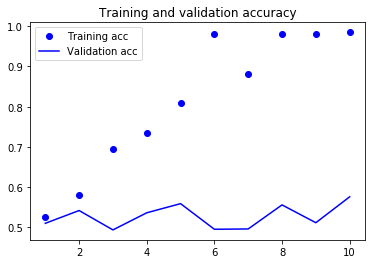

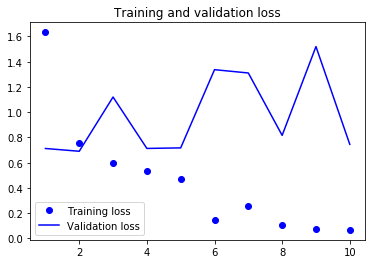

In [100]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The model quickly starts overfitting, which is unsurprising given the small number of training samples. Validation accuracy has high variance for the same reason, but it seems to reach the high 50s.

## Listing 6.16 Training the same model without pretrained word embeddings
---

In that case, you’ll learn a taskspecific embedding of the input tokens, which is generally more powerful than pretrained word embeddings when lots of data is available.

In [101]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

import matplotlib.pyplot as plt

%reload_ext version_information
%version_information keras, matplotlib

Software versions
Python 3.6.6 64bit [MSC v.1900 64 bit (AMD64)]
IPython 7.1.1
OS Windows 10 10.0.17134 SP0
keras 2.2.4
matplotlib 2.2.2
Thu Nov 08 21:36:11 2018 ¢¥eCN©öI¡¾©ö C¡ÍA¨ª¨öA

In [102]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [103]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10, 
                    batch_size=32,
                    validation_data=(x_val, y_val))

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 0.6951 - acc: 0.4350 - val_loss: 0.6950 - val_acc: 0.5167
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: 0.5028 - acc: 0.9800 - val_loss: 0.7054 - val_acc: 0.5069
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 0.2898 - acc: 0.9850 - val_loss: 0.7012 - val_acc: 0.5187
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.1183 - acc: 1.0000 - val_loss: 0.7166 - val_acc: 0.5156
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0524 - acc: 1.0000 - val_loss: 0.7150 - val_acc: 0.5288
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0261 - acc: 1.0000 - val_loss: 0.7249 - val_acc: 0.5260
Epoch 7/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0141 - acc: 1.0000 - val_loss: 0.7211 - val_acc: 0.5389
Epoch 8/10
200/200 [========

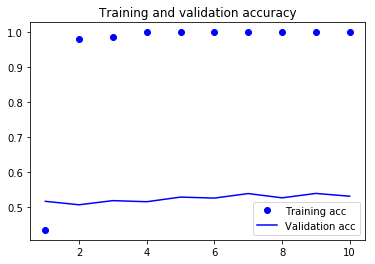

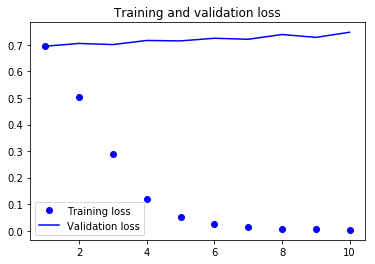

In [104]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In this case, pretrained word embeddings outperform jointly learned embeddings. Because you have only 200 training samples. If you increase the number of training samples, this will quickly stop being the case.

## Listing 6.17 Tokenizing the data of the test set
---

In [105]:
imdb_dir = 'D:/utils/jin_utils/data/dataset/aclImdb/'
test_dir = os.path.join(imdb_dir, 'test')

In [106]:
labels = []
texts = []

for label_type in ['neg', 'pos']:
    file_path = os.path.join(test_dir, label_type)
    
    for filename in sorted(glob.glob(os.path.join(file_path, '*.txt'))):
        with open(filename, encoding='utf8') as f:
            texts.append(f.read())

        # Negative label: 0 
        if label_type == 'neg':
            labels.append(0)
        # Positive label: 1
        else:
            labels.append(1)
            
sequences = tokenizer.texts_to_sequences(texts)

x_test = pad_sequences(sequences, maxlen=max_len)
y_test = np.asarray(labels)

## Listing 6.18 Evaluating the model on the test set
---

In [107]:
model.load_weights('models/6.1_glove_model.h5')

model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 50us/step


[0.7448734481906891, 0.57604]

You get an appalling test accuracy of 56%. Working with just a handful of training samples is difficult!